### Notebook for Project2 for Programming for Data Analysis

## An analysis of paleo-present climate data

***

## Table of Contents

1. [Introduction](#Introduction)
2. 

### CO2 vs Temperatue Anomaly from 800kyrs - present


---

### Read in CO2 Data files

In [16]:
# Import Modules
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [17]:
# Read Data

# Need to installxlrd to reaad .xls file
# pip install xlrd

ncei_df_col_names = ["year", "CO2", 'sigma']
ncei_df = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite",skiprows = range(1, 15),names=ncei_df_col_names)
gml_df_col_names = ["year", "CO2", 'UNC']
gml_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv",skiprows=44, sep=",", names=gml_df_col_names)

In [18]:
new_ncei_df = 1950-ncei_df['year']
ncei_df['date'] = new_ncei_df
ncei_df['date'] = ncei_df['date'].astype(int)

In [19]:
#ncei_df

In [20]:
#gml_df

In [21]:
#gml_df.describe()
# Change the date to datetime rather than object
from datetime import datetime
#gml_df
# pd.to_datetime(gml_df['year'])
#pd.gml_df['year'] = datetime.strptime(gml_df['year'], '%y')

### Plot Data

<Axes: xlabel='year', ylabel='CO2'>

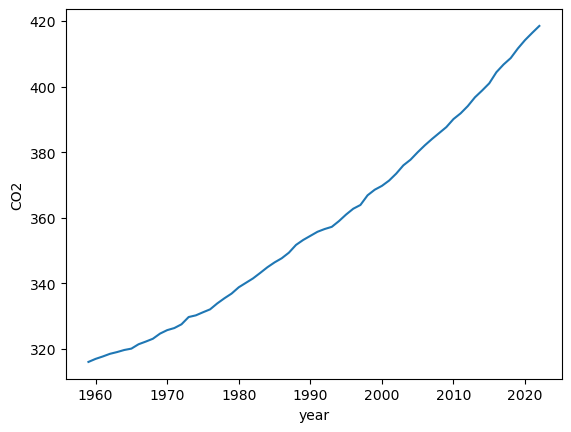

In [22]:
sns.lineplot(data=gml_df, x='year', y='CO2')

<Axes: xlabel='date', ylabel='CO2'>

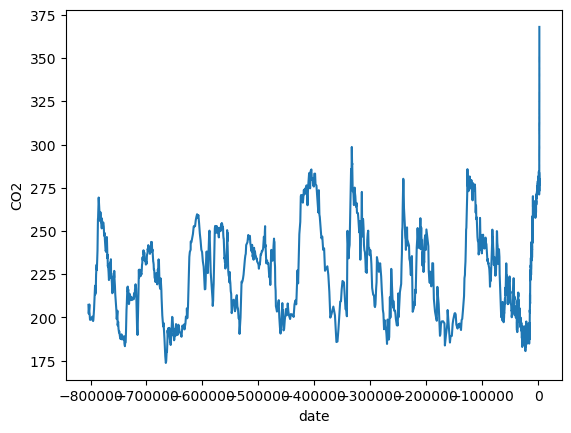

In [23]:
sns.lineplot(data=ncei_df, x='date', y='CO2')

In [24]:
# ncei_df.head(48)

In [25]:
# gml_df.head(43)

### Combine the data to validate the data is similar for overlapping years

In [26]:
# Extrat data for overlapping years

gml_comp_df = gml_df.head(43)
# Reverse the order in the dataframe. From: https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
gml_comp_df.iloc[::-1]
ncei_comp_df = ncei_df.head(48)

In [27]:
#sns.lineplot(data=gml_comp_df, x='year', y='CO2')
#sns.lineplot(data=ncei_comp_df, x='date', y='CO2')

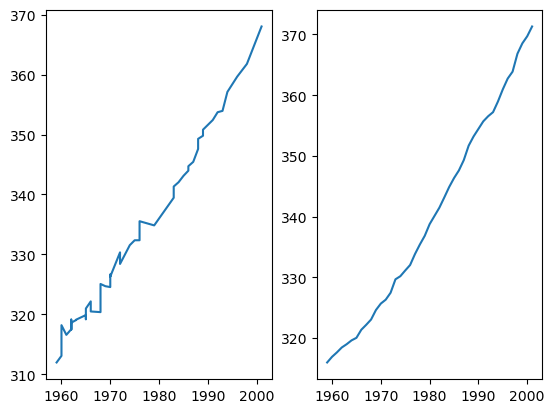

In [28]:
# Combine the plots to validate similar data
# If the data matches then we are good to combine the files for use as our final data file

# Note to self - find a better way to show this
# Combine the raw data and just have 1 plot with two lines - need to fix dates so they match first

figure, (ax1, ax2) = plt.subplots(1, 2)
# data=ncei_comp_df, x='date', y='CO2'
x1 = ncei_comp_df['date']
y1 = ncei_comp_df['CO2']

x2 = gml_comp_df['year']
y2 = gml_comp_df['CO2']

ax1.plot(x1, y1);
ax2.plot(x2, y2);

Add analysis of plots here...

### Import the Temperature/Temperature Anomoly Data

Sources are - https://www.temperaturerecord.org/#sources

https://www.climatelevels.org/files/temperature_dataset.xlsx   
OR   
https://www.climatelevels.org/files/temperature_dataset.xlsx   

Check which one works better...Need to get recent data then and combne as above...


In [ ]:
temp_col_names = ["age", "anomoly", 'sigma']
temp_df = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite",skiprows = range(1, 15),names=ncei_df_col_names)

# To specify certain columns...https://stackoverflow.com/questions/33655127/how-to-read-certain-columns-from-excel-using-pandas-python
df = pd.read_excel(file_location,sheet_name='Sheet1', usecols="A,C,F")


### Export Data

Export to json   
Export to csv

## Examine one other feature - CH4 for example



---

### Examine Irish Context



---

### Fuse and analysis of data from various data sources and Export to csv and json



---

### Analysis of all the above data - trends/relationships etc (temporal leads, lags, frequency analysis etc)



---

### Predict global temperature anomaly over next few decades (synthesise data) and compare to pushed climate modles - if atmospheric CO2 trends continue



---

### Comment on accellerated warming based on very latest features (e.g temperature/polar-ice-coverage)



---

### Appendix/References etc

***

#### End

Notes:

In [29]:
# json

# Reading from a json file
'''
import json

FILENAME = "json_text.txt"

with open(FILENAME, 'rt') as f:
    dict = json.load(f)

print (dict["name"], dict ["age"])

print (dict)
'''


# Writing to a json file
'''
import json

FILENAME = "json_text.txt"

dict = {}
dict["name"] = input("Enter a name: ")
dict["age"] = int(input("Enter an age: "))
print (dict)

#1 - assume the file exists
with open(FILENAME, 'wt') as f:
    json.dump(dict, f)
'''

'\nimport json\n\nFILENAME = "json_text.txt"\n\ndict = {}\ndict["name"] = input("Enter a name: ")\ndict["age"] = int(input("Enter an age: "))\nprint (dict)\n\n#1 - assume the file exists\nwith open(FILENAME, \'wt\') as f:\n    json.dump(dict, f)\n'

Data Sources
Link to CO2 data -800000 to present+51 (present is 1950)
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt   
Taken from https://www.ncei.noaa.gov/access/paleo-search/study/17975

Link to Mauna Loa data 1959 - 2022
https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv   
Taken from https://gml.noaa.gov/ccgg/trends/data.html

Link to Temperature data...